Detecting Deceptive Reviews using Natural Language Processing

The rising influence of user-generated online reviews has led to growing incentive for businesses to solicit and manufacture DECEPTIVE OPINION SPAM — fictitious reviews that have been deliberately written to sound authentic and deceive the reader.

In Todays digital era, Your purchase decisions are increasingly influenced by user-generated online reviews of products and services. Accordingly, there is a growing incentive for businesses to solicit and manufacture fictitious reviews that have been deliberately written to sound authentic and deceive the reader.

Reviews intended to promote or hype an offering, and which therefore express a positive sentiment towards the offering, are called positive deceptive opinion spam. In contrast, reviews intended to disparage or slander competitive offerings, and which therefore express a negative sentiment towards the offering, are called negative deceptive opinion spam.

In this Data we distinguish between two kinds of deceptive opinion spam, depending on the sentiment expressed in the review i.e positive Deceptive and Negative Deceptive Review. We will build a end to end solution which will help to pass a review and will give you back a label deciding whether the review is Deceptive or Not.

In [0]:
import pandas as pd
pd.set_option('display.max_columns',100) # Displaying max columns present in the dataframe
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # remove warnings from the notebook

In [2]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=4bbe4fc207df98456b5f3e628869ff8f0a3370c9081feab10cf078059e60847c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [3]:
import wget 
wget.download('https://myleott.com/op_spam_v1.4.zip')

'op_spam_v1.4.zip'

In [0]:
import zipfile
with zipfile.ZipFile('op_spam_v1.4.zip', 'r') as z:
    z.extractall()

In [0]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent =  ' ' * 6 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 6 * (level + 1)
        for f in files[:5]:
            print('{}{}'.format(subindent, f))

In [6]:
list_files('op_spam_v1.4/')

/
      README.md
      LICENSE
negative_polarity/
      deceptive_from_MTurk/
            fold4/
                  d_knickerbocker_9.txt
                  d_swissotel_10.txt
                  d_sheraton_9.txt
                  d_homewood_7.txt
                  d_sheraton_19.txt
            fold5/
                  d_allegro_1.txt
                  d_intercontinental_3.txt
                  d_allegro_10.txt
                  d_intercontinental_15.txt
                  d_intercontinental_4.txt
            fold2/
                  d_ambassador_9.txt
                  d_affinia_20.txt
                  d_hardrock_20.txt
                  d_affinia_13.txt
                  d_ambassador_8.txt
            fold3/
                  d_fairmont_18.txt
                  d_hyatt_14.txt
                  d_hyatt_8.txt
                  d_omni_5.txt
                  d_fairmont_2.txt
            fold1/
                  d_james_18.txt
                  d_james_11.txt
                  d_james_8.txt

In [0]:
# Accessing data for Positive True Reviews
import glob
import ntpath
path = 'op_spam_v1.4/positive_polarity/'
files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]

In [8]:
files[:5]

['op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold4/d_knickerbocker_9.txt',
 'op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold4/d_swissotel_10.txt',
 'op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold4/d_sheraton_9.txt',
 'op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold4/d_homewood_7.txt',
 'op_spam_v1.4/positive_polarity/deceptive_from_MTurk/fold4/d_sheraton_19.txt']

In [9]:
len(files)

800

In [10]:
filename= list()
reviews= list()
for file in files:
    with open(file, 'r') as f:
        filename.append(ntpath.basename(file))
        reviews.append(f.read())
positive_df= pd.DataFrame({'filename': filename, 'review': reviews})
positive_df.head()

,filename,review
0,d_knickerbocker_9.txt,We stayed at the Millennium Knickerbocker last...
1,d_swissotel_10.txt,The Swissotel Chicago was by far the best hote...
2,d_sheraton_9.txt,I stayed at the Sheraton Chicago Hotel and Tow...
3,d_homewood_7.txt,I travel often and whenever I travel I prefer ...
4,d_sheraton_19.txt,We were hungry and tired when we checked into ...


In [11]:
positive_df.shape

(800, 2)

In [0]:
path = 'op_spam_v1.4/negative_polarity/'
files = [f for f in glob.glob(path + "**/*.txt", recursive=True)]
filename= list()
reviews= list()
for file in files:
    with open(file, 'r') as f:
        filename.append(ntpath.basename(file))
        reviews.append(f.read())
negative_df= pd.DataFrame({'filename': filename, 'review': reviews})

In [13]:
negative_df.head()

,filename,review
0,d_knickerbocker_9.txt,We stayed in the Millennium Knickerbocker Hote...
1,d_swissotel_10.txt,While staying at the Swissotel Chicago I exper...
2,d_sheraton_9.txt,I want everyone to know about the awful experi...
3,d_homewood_7.txt,Homewood Suites is a Hilton Group Hotel locate...
4,d_sheraton_19.txt,I stayed at the Sheraton Chicago Hotel and Tow...


In [0]:
positive_df['polarity']= ['positive'] * positive_df.shape[0]
negative_df['polarity']= ['negative'] * negative_df.shape[0]

In [0]:
# Concatenating DataFrames
final_df= pd.concat([positive_df, negative_df], axis=0, ignore_index= True)

In [16]:
final_df.head()

,filename,review,polarity
0,d_knickerbocker_9.txt,We stayed at the Millennium Knickerbocker last...,positive
1,d_swissotel_10.txt,The Swissotel Chicago was by far the best hote...,positive
2,d_sheraton_9.txt,I stayed at the Sheraton Chicago Hotel and Tow...,positive
3,d_homewood_7.txt,I travel often and whenever I travel I prefer ...,positive
4,d_sheraton_19.txt,We were hungry and tired when we checked into ...,positive


In [17]:
final_df['hotel']= final_df.filename.str.extract('_(.*)_')
final_df.hotel.head()

0    knickerbocker
1        swissotel
2         sheraton
3         homewood
4         sheraton
Name: hotel, dtype: object

In [0]:
final_df['label']= final_df.filename.str[0].map({'d':'deceptive', 't': 'true'})

In [19]:
final_df['label'].head()

0    deceptive
1    deceptive
2    deceptive
3    deceptive
4    deceptive
Name: label, dtype: object

In [0]:
final_df.drop('filename', axis=1, inplace= True)

In [0]:
# Save this to a CSV
final_df.to_csv('final_df.csv', index= False)

In [0]:
df= final_df.copy()

In [23]:
df.groupby(['polarity', 'label']).count()

review  hotel
polarity label                   
negative deceptive     400    400
         true          400    400
positive deceptive     400    400
         true          400    400

In [24]:
df.hotel.unique()

array(['knickerbocker', 'swissotel', 'sheraton', 'homewood', 'allegro',
       'intercontinental', 'amalfi', 'palmer', 'ambassador', 'affinia',
       'hardrock', 'talbott', 'fairmont', 'hyatt', 'omni', 'conrad',
       'james', 'sofitel', 'hilton', 'monaco'], dtype=object)

In [25]:
df.groupby(['hotel', 'polarity']).count()

review  label
hotel            polarity               
affinia          negative      40     40
                 positive      40     40
allegro          negative      40     40
                 positive      40     40
amalfi           negative      40     40
                 positive      40     40
ambassador       negative      40     40
                 positive      40     40
conrad           negative      40     40
                 positive      40     40
fairmont         negative      40     40
                 positive      40     40
hardrock         negative      40     40
                 positive      40     40
hilton           negative      40     40
                 positive      40     40
homewood         negative      40     40
                 positive      40     40
hyatt            negative      40     40
                 positive      40     40
intercontinental negative      40     40
                 positive      40     40
james            negative      40     40
                 positive      40     40
knickerbocker    negative      40     40
                 positive      40     40
monaco           negative      40     40
                 positive      40     40
omni             negative      40     40
                 positive      40     40
palmer           negative      40     40
                 positive      40     40
sheraton         negative      40     40
                 positive      40     40
sofitel          negative      40     40
                 positive      40     40
swissotel        negative      40     40
                 positive      40     40
talbott          negative      40     40
                 positive      40     40

In [26]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 826.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.1.0-cp36-none-any.whl size=828255078 sha256=5c78b7d91deec4d0a50447888019b034eed3268545192d5c0c2d50354fe8b890
  Stored in directory: /tmp/pip-ephem-wheel-cache-gcq7gv8u/wheels/b4/d7/70/426d313a459f82ed5e06cc36a50e2bb2f0ec5cb31d8e0bdf09
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


#Comparing Word Count in True and Deceptive reviews

To get the word counts in each reviews we need to tokenise the reviews and we are going to use spaCy for all our preprocessing.

In [0]:
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()

In [0]:
df['spacy']= df.review.str.lower().apply(nlp)

In [0]:
def word_count(row):
    return len(list(row))

df['word_count']= df.spacy.apply(word_count)

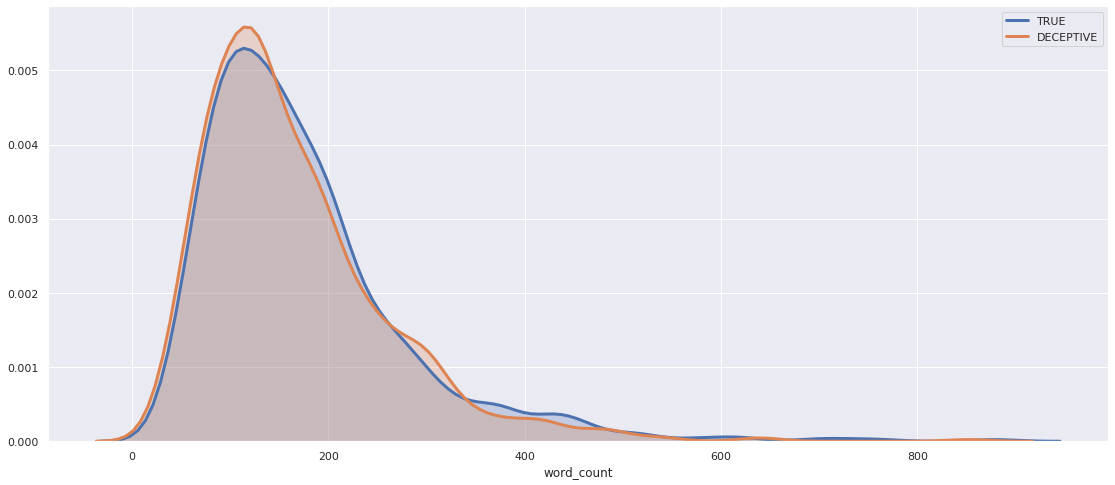

In [30]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'word_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'word_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

# Note

Not much difference between true & deceptive reviews

# Comparing Punctuation Counts in True and Deceptive Reviews

In [0]:
import string
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
punc= list(set(string.punctuation))
def punc_count(row):
    return count(row, punc)

df['punc_count']= df.review.apply(punc_count)

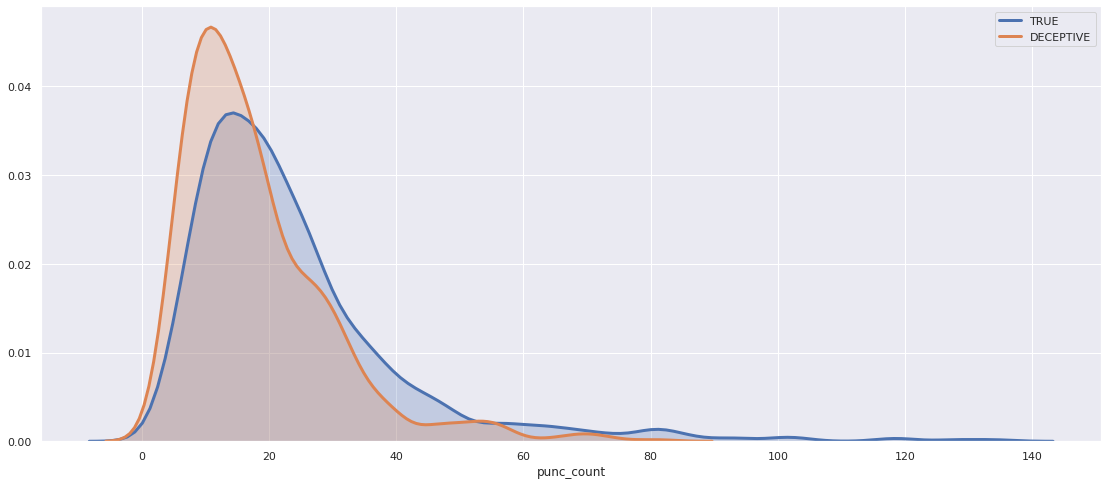

In [32]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'punc_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'punc_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

As you can observe, "punctuation count" can be a factor in determining between true & deceptive reviews

In [33]:
# Comparing Describe in the True and Deceptive Reviews
pd.DataFrame({'True': df[df.label == 'true']['punc_count'].describe().values, 
             'Deceptive': df[df.label == 'deceptive']['punc_count'].describe().values},
              index= df.describe().index)

,True,Deceptive
count,800.000000,800.000000
mean,23.870000,18.022500
std,17.290005,11.737833
min,1.000000,3.000000
25%,13.000000,10.000000
50%,20.000000,15.000000
75%,28.000000,24.000000
max,134.000000,81.000000


Punctuations in True Reviews are a bit more skewed towards the right compared to the Deceptive.

# Comparing the counts of people citing Hotel names in reviews

In [0]:
pd.set_option('display.max_rows', 1600)
df['hotel_name_count']= df.apply(lambda x: str(x.review).lower().count(str(x.hotel)), axis = 1)

In [35]:
df.groupby(['label', 'polarity'])['hotel_name_count'].sum()

label      polarity
deceptive  negative    426
           positive    465
true       negative    271
           positive    302
Name: hotel_name_count, dtype: int64

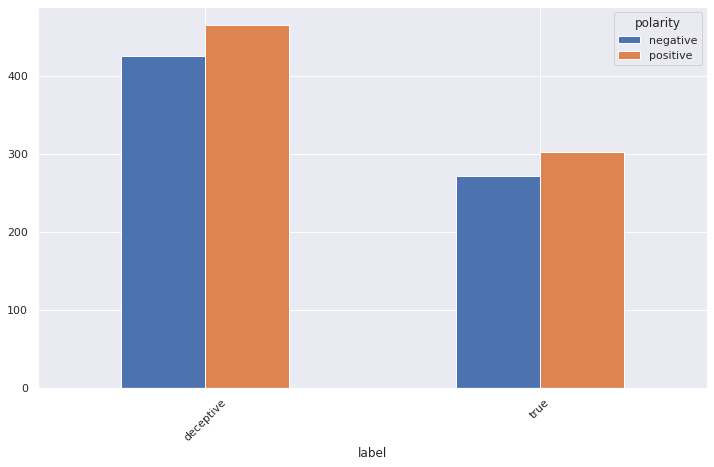

In [36]:
df.groupby(['label', 'polarity'])['hotel_name_count'].sum().unstack().plot(kind= 'bar', rot= 45, figsize= (12, 7));

Thats a great insight you can see right away that people writing deceptive reviews cites the names of Hotel a lot in their review.

# Comparing Number of Unique words in reviews

In [0]:
df['unique_word_count']= df['spacy'].apply(lambda x: len(set(list(x))))

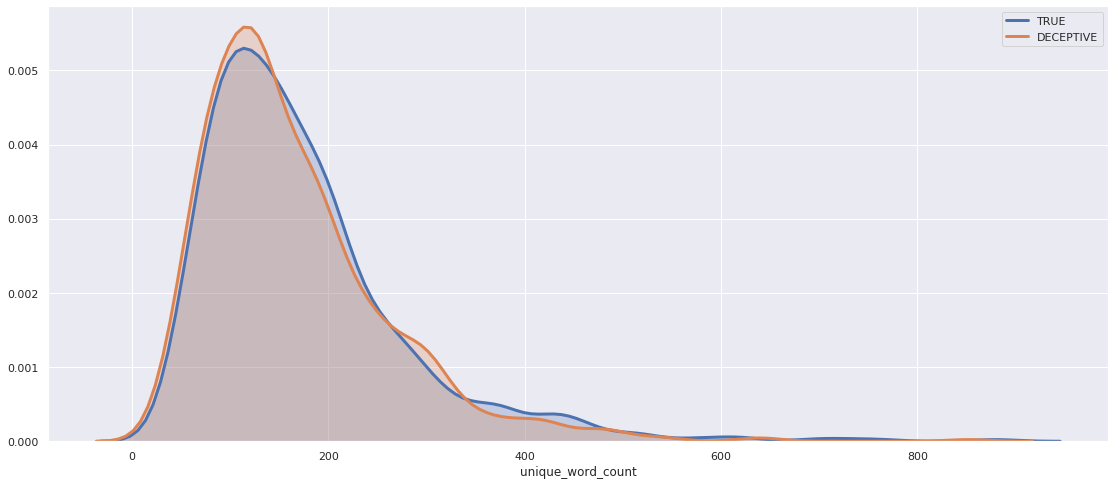

In [38]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'unique_word_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'unique_word_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

# Comparing number of stop words

In [39]:
print(nlp.Defaults.stop_words)

{'former', 'several', 'should', 'there', '‘m', 'were', 'as', 'perhaps', 'much', 'throughout', 'thru', 'under', '‘s', 'upon', '’d', 'anyway', 'myself', 'hence', 'this', 'it', 'also', 'only', 'first', 'in', 'already', 'nowhere', "n't", 'across', 'although', 'even', 'everywhere', 'whenever', 'behind', 'nine', 'whether', 'bottom', 'us', 'whither', 'latter', 'very', 'indeed', 'am', 'forty', 'has', 'by', 'do', 'two', 'used', 'afterwards', 'any', 'hereupon', 'not', 'amongst', 'please', 'quite', 'see', 'three', 'seeming', 'than', 'nevertheless', 'why', 'itself', 'just', 'always', 'full', 'less', 'part', 'wherever', 'four', 'say', 'yourself', 'namely', 'whole', 'anyhow', 'hereafter', 'rather', 'then', 'various', 'must', 'beside', 'sometime', 'being', 'be', 'each', 'thence', 'which', 'unless', "'d", 'on', "'re", 'anyone', 'what', 'fifteen', 'otherwise', '’ve', 'off', 'ever', 'becomes', 'give', 'himself', 'been', 'over', 'everything', 'per', 'therefore', 'n’t', 'ca', 'at', '’re', 'he', 'now', 'do

In [0]:
count = lambda l1, l2: len(list(filter(lambda c: c in l2, l1)))
stop= list(nlp.Defaults.stop_words)

df['stop_count']= df.review.apply(lambda x: count(x, stop))

We are going to use the same count Function, I used for counting the number of punctuation, but here instead of punctuations we have list of stop words.

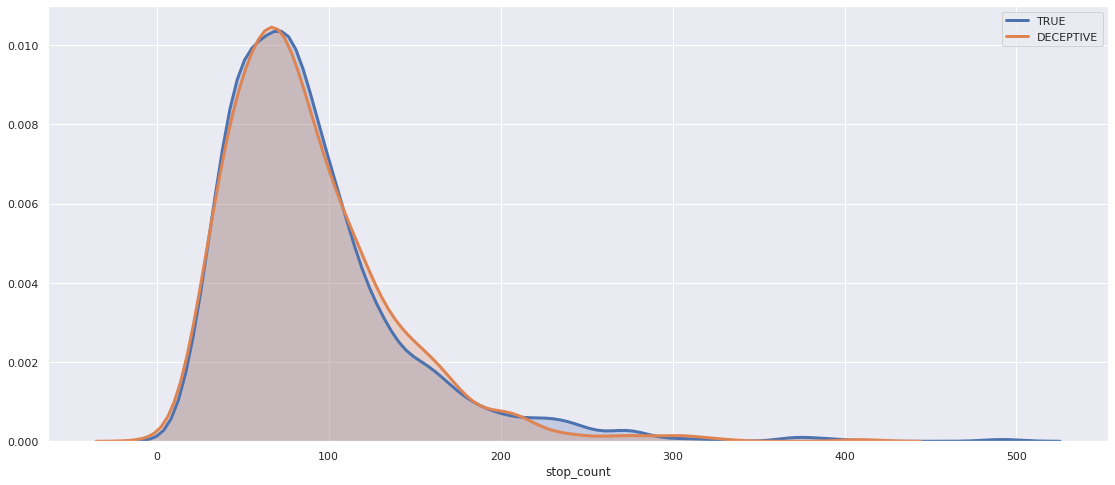

In [41]:
sns.set()
fig = plt.figure(figsize=(19, 8))
sns.distplot(df.loc[df.label== 'true', 'stop_count'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'TRUE')
sns.distplot(df.loc[df.label== 'deceptive', 'stop_count'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3}, 
             label= 'DECEPTIVE');

Not such significant difference in use of stop words

#Counting the POS Tags in the reviews
This Below function takes in the DataFrame and returns a dataframe comparing the POS tags counts in the true and deceptive reviews.

In [0]:
from collections import Counter
def pos_tag_count(df):
    
    # Create to empty lists in which we will store the list of POS Tags
    
    dec_pos_tags= list()
    true_pos_tags= list()
    # Iterate over Each Spacy Document Object
    
    for doc in df[df.label == 'true'].spacy:
        TAG_count = doc.count_by(spacy.attrs.TAG)
        true_dict = dict()
        
        # Spacy Returns a dictionary object with Hash Value of Pos and Counts
        # After every Iteration Update the POS Tag distioanry
        
        for key,value in sorted(TAG_count.items()):
            true_dict.update({ doc.vocab[key].text : value})
            
        # After updating the dict append it to the list we created at the very beiginning
        
        true_pos_tags.append(true_dict)
    
    # Then just follow the same above steps for the deceptive reviews as well  
    for doc in df[df.label == 'deceptive'].spacy:
        TAG_count = doc.count_by(spacy.attrs.TAG)
        dec_dict = dict()
        for key,value in sorted(TAG_count.items()):
            dec_dict.update({ doc.vocab[key].text : value})
        dec_pos_tags.append(dec_dict)
    
    '''    
    NoW the above returns a count object for each review in True and Deceptive we need to add them up
    for whole DataFrame using a counter object
    '''
    true_tag_count = Counter()
    for i in range(0,len(true_pos_tags)):
        true_tag_count = true_tag_count + Counter(true_pos_tags[i])
    dec_tag_count = Counter()
    for i in range(0,len(dec_pos_tags)):
        dec_tag_count = dec_tag_count + Counter(dec_pos_tags[i])
    true_tag_count = dict(true_tag_count)
    dec_tag_count = dict(dec_tag_count)
    
    ## Now Create a DataFrame for True Reviews with POS Tags and Counts
    true_pos = pd.DataFrame()
    true_pos['tag'] = true_tag_count.keys()
    true_pos['true_cnt'] = true_tag_count.values()
    
    ## Now Create a DataFrame for Deceptive Reviews with POS Tags and Counts
    dec_pos = pd.DataFrame()
    dec_pos['tag'] = dec_tag_count.keys()
    dec_pos['dec_cnt'] = dec_tag_count.values()
    
    # Merge these two DataFrames on Tag name
    reviews_tags = true_pos.merge(dec_pos, on='tag', how='left')
    reviews_tags = reviews_tags.set_index('tag')
    return reviews_tags

In [43]:
pos_tag_count(df).head(10)

,true_cnt,dec_cnt
tag,,
RB,9068,9003.0
NNS,4759,4006.0
IN,13483,13139.0
VBG,1690,1900.0
-RRB-,540,153.0
",",4566,4182.0
UH,235,149.0
VBN,2390,2286.0
PRP$,1906,2752.0


The above function takes in the DataFrame and returns the count of the POS tags in true and deceptive reviews setting the index to the POS Tags.

#POS Tags Counts in Positive Reviews

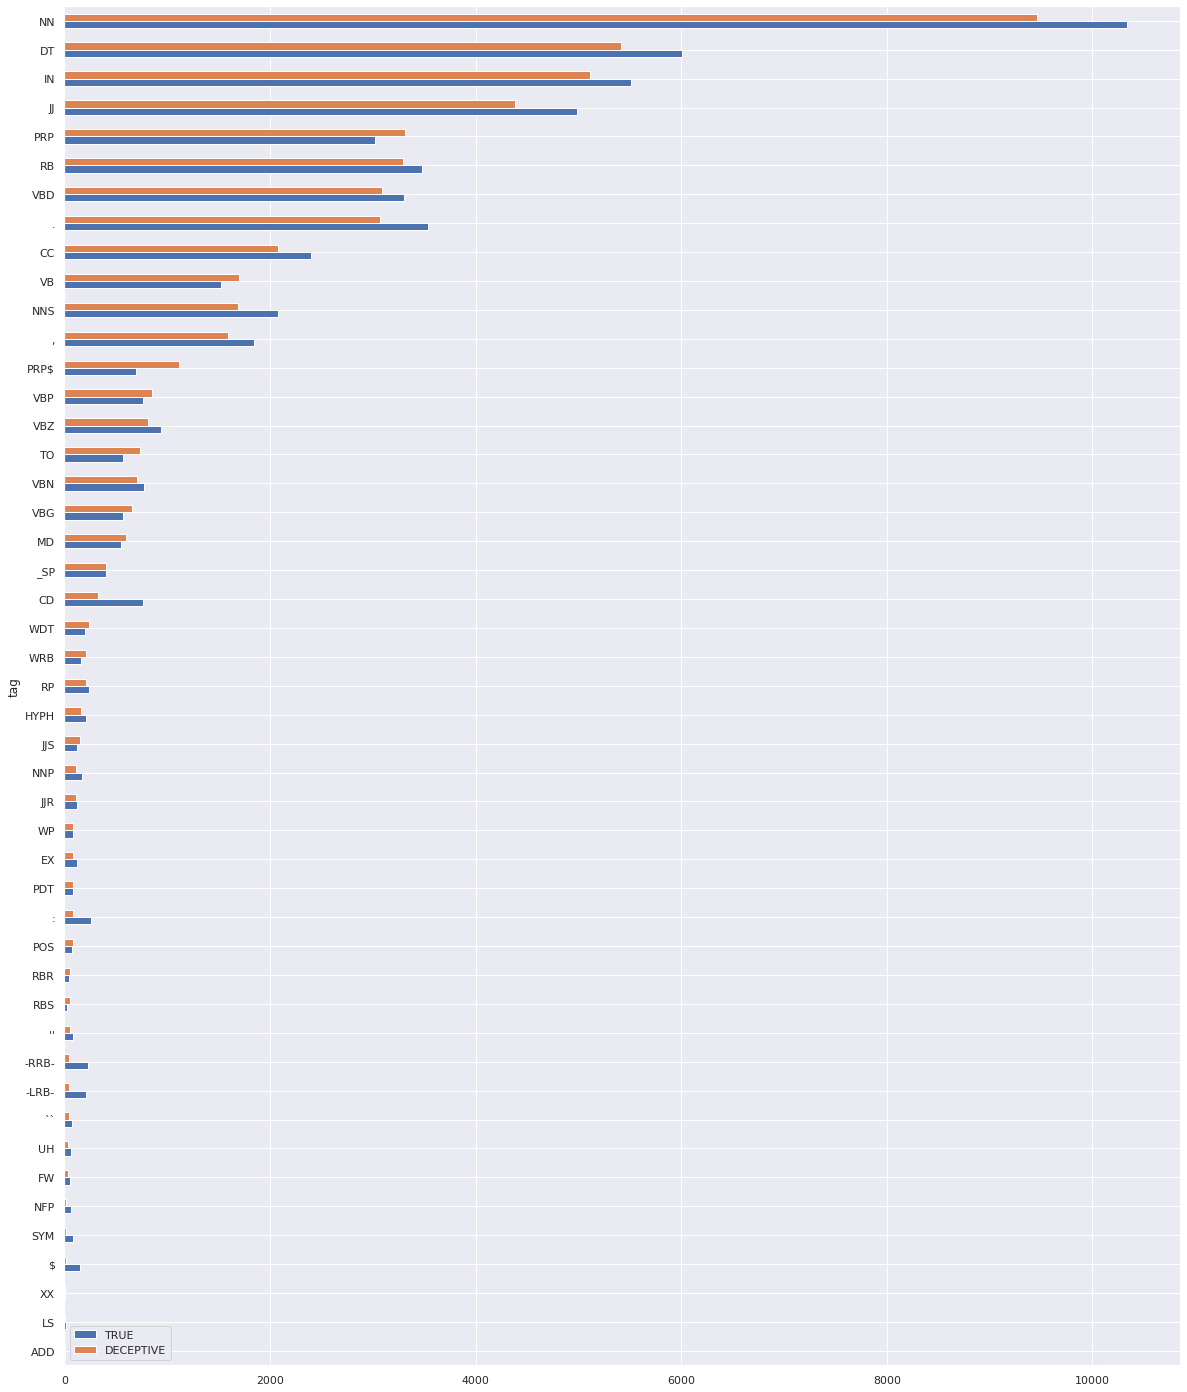

In [44]:
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df[df.polarity == 'positive']).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

**Observations in Positive Reviews:**

**Personal Pronoun (PRP)**

I, he, she, it

The count of PRP(Personal pronoun) is higher is Deceptive compared to the true Reviews.

**Possesive Pronoun (PRP$)**

my, his, her

The count of PRP$(Possesive Pronoun) is higher is Deceptive compared to the true Reviews.

Verb, non-3rd person singular present (VBP)

am, are

The count of VBP(Verb, non-3rd person singular present) is higher is Deceptive compared to the true Reviews.

Note: We Will use these in the POS Tag filtering in one of our later sections.



# POS Tags counts in Negative Reviews

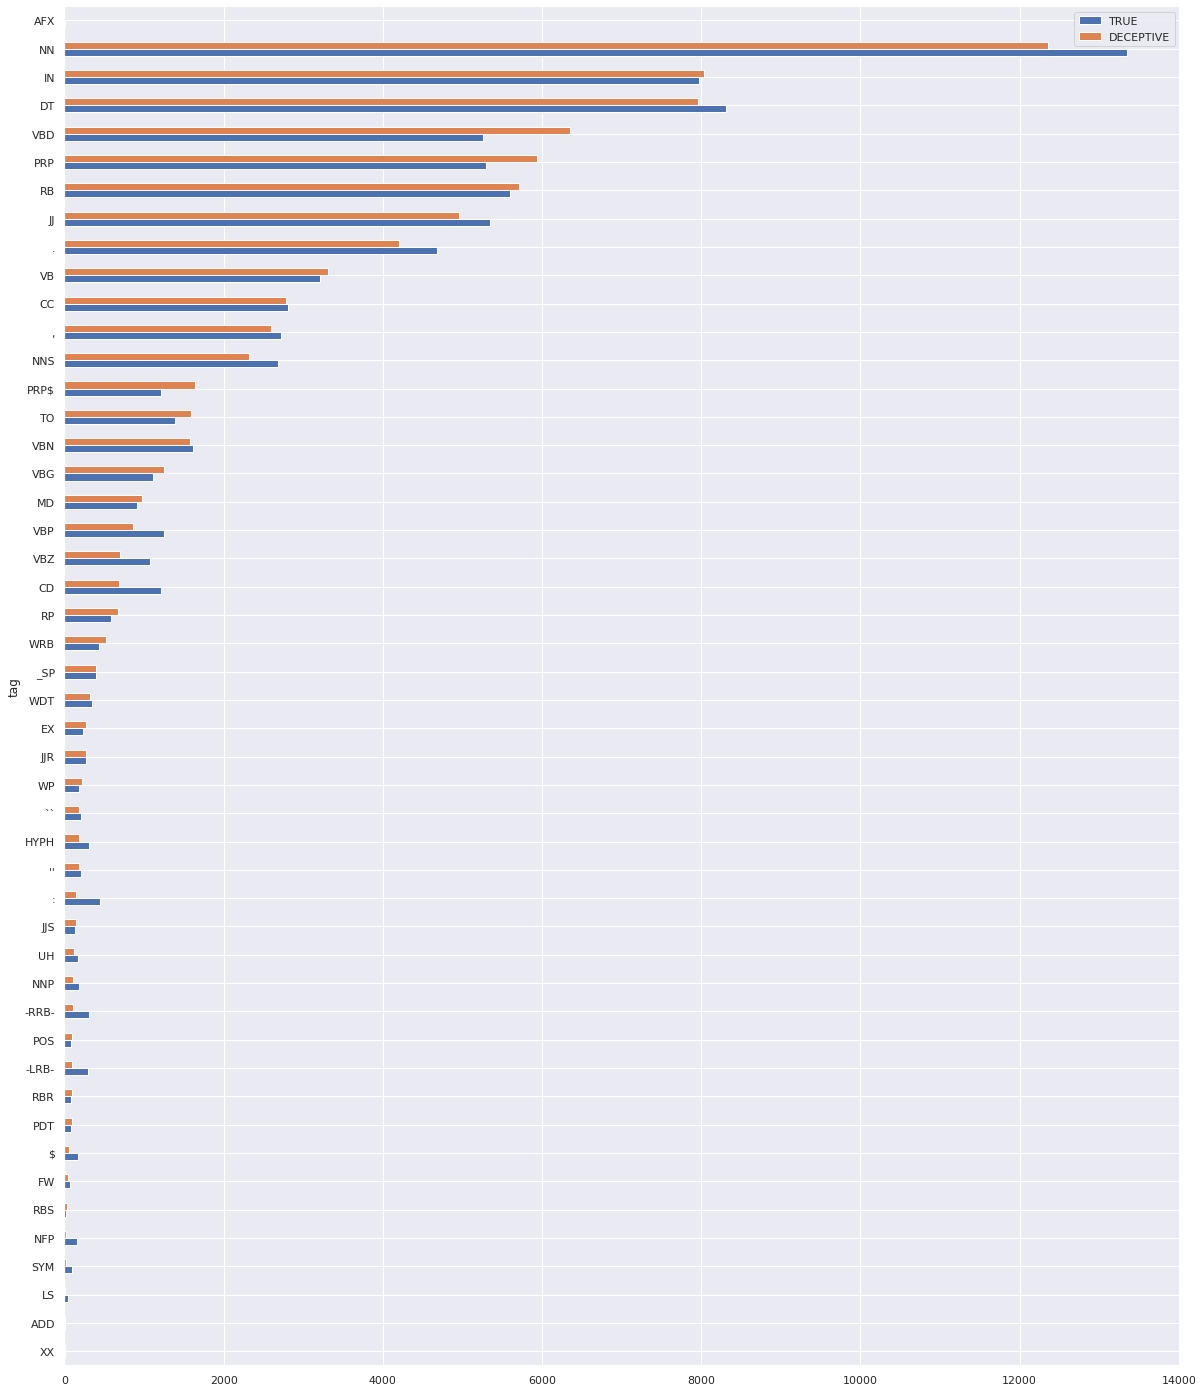

In [45]:
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df[df.polarity == 'negative']).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

**Observations in Negative Reviews:**

**Personal Pronoun (PRP)**

I, he, she, it

The count of PRP(Personal pronoun) is higher is Deceptive compared to the true Reviews.

**Possesive Pronoun (PRP$)**

my, his

The count of PRP$(Possesive Pronoun) is higher is Deceptive compared to the true Reviews.

**Verb, past tense (VBD)**

was, were

The count of VBD(Verb, past tense) is higher is Deceptive compared to the true Reviews.

Note: We Will use these in the POS Tag filtering in one of our later sections.

POS Tags Combining Positive and Negative Sentiments

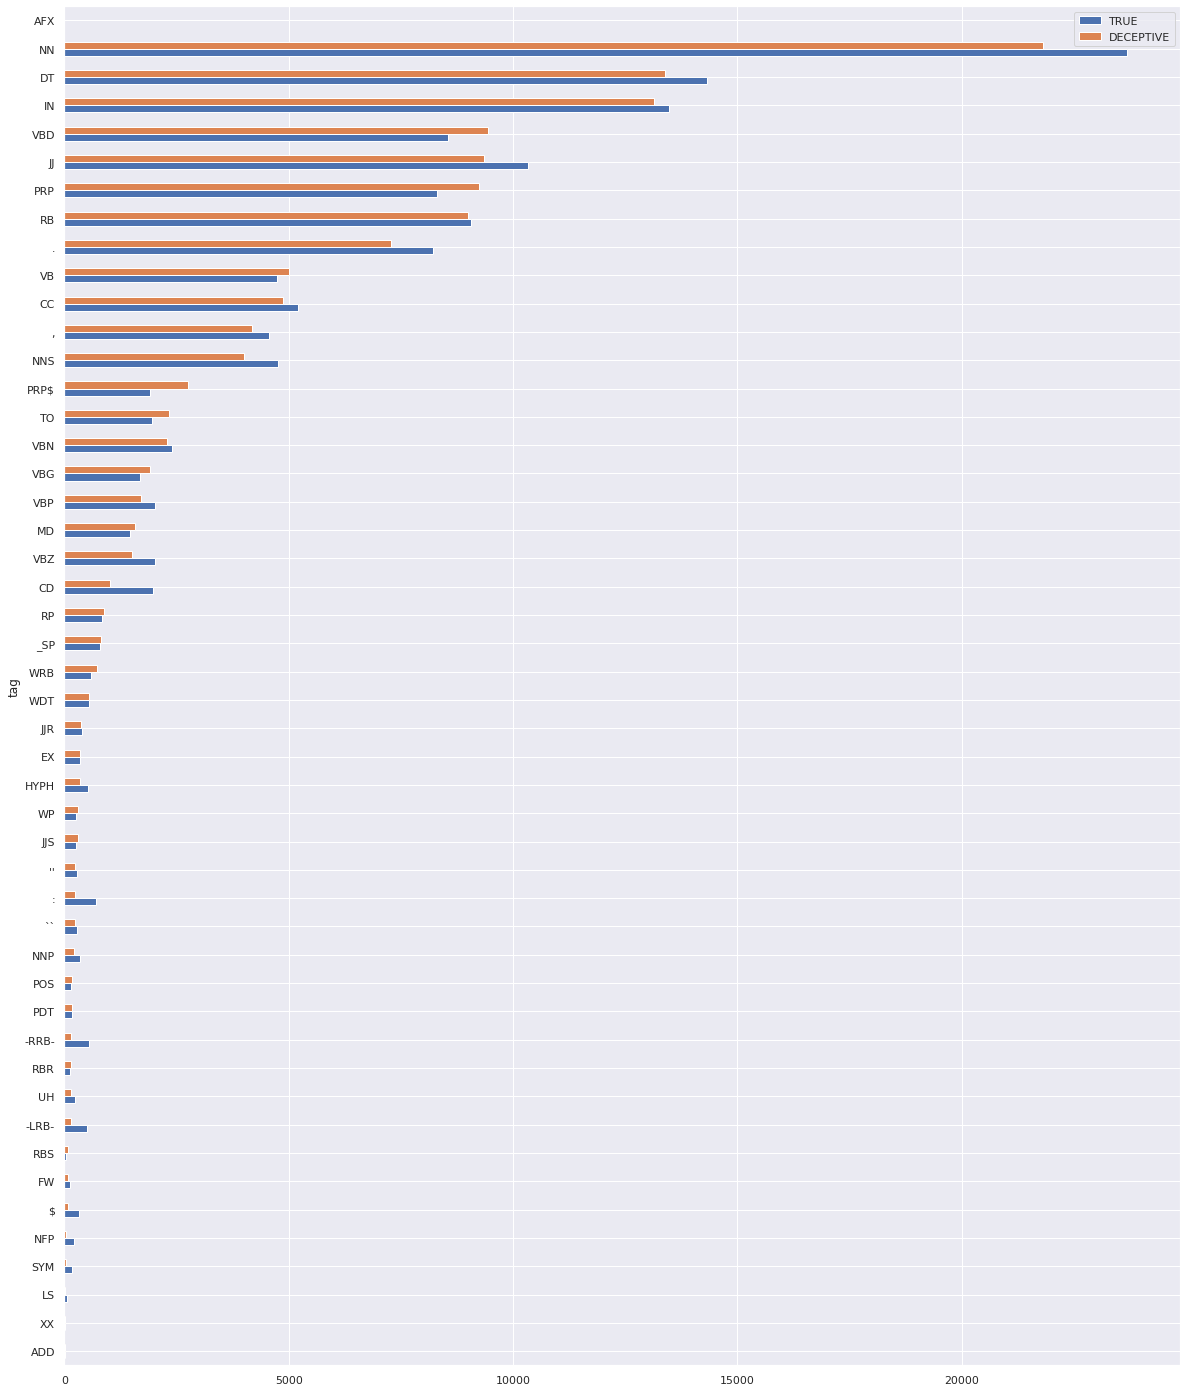

In [46]:
fig, ax = plt.subplots(figsize=(20, 25))
pos_tag_count(df).sort_values(by=['dec_cnt']).plot(kind= 'barh', rot=0, ax=ax);
ax.legend(['TRUE', 'DECEPTIVE']);

Observations in Combined Positive and Negative Reviews:

Personal Pronoun (PRP)

I, he,she, it

The count of PRP(Personal pronoun) is higher is Deceptive compared to the true Reviews.

Possesive Pronoun (PRP$)

my, his, her

The count of PRP$(Possesive Pronoun) is higher is Deceptive compared to the true Reviews.

Note: We Will use these in the POS Tag filtering in one of our later sections.


#Most Frequent Words in the reviews

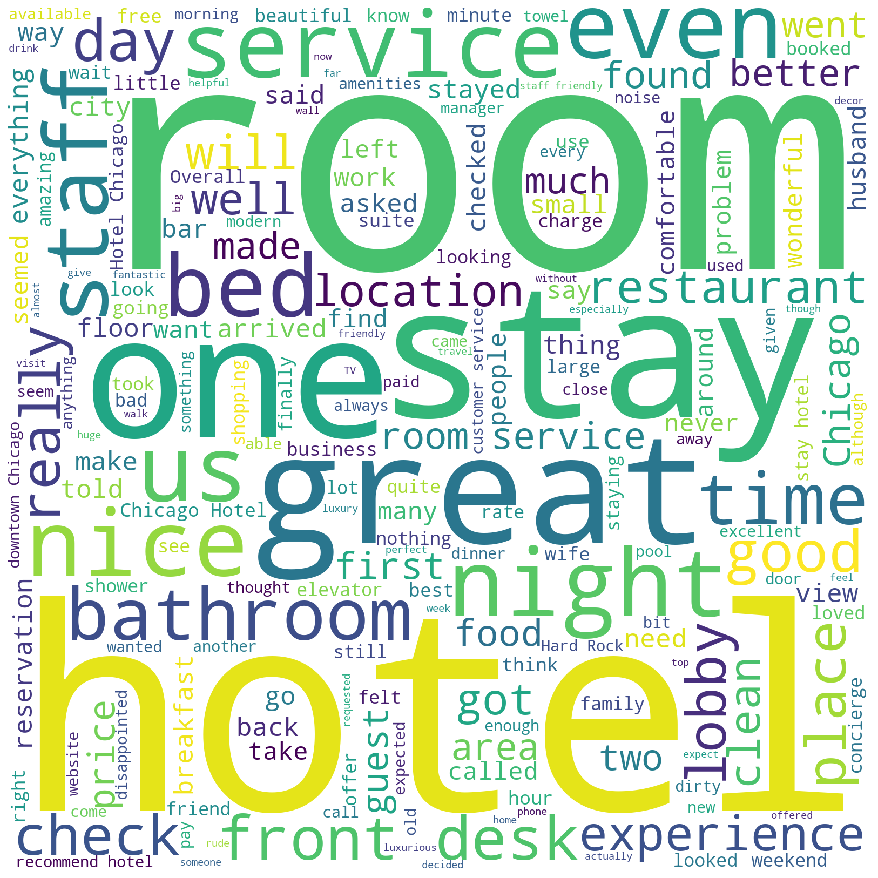

In [47]:
# Python program to generate WordCloud  
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd   
  
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',  
                min_font_size = 10).generate(".".join(df.review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Observations:

Most used words in the reviews are hotel, room, stay, great, service.

#Most frequent words in True Reviews

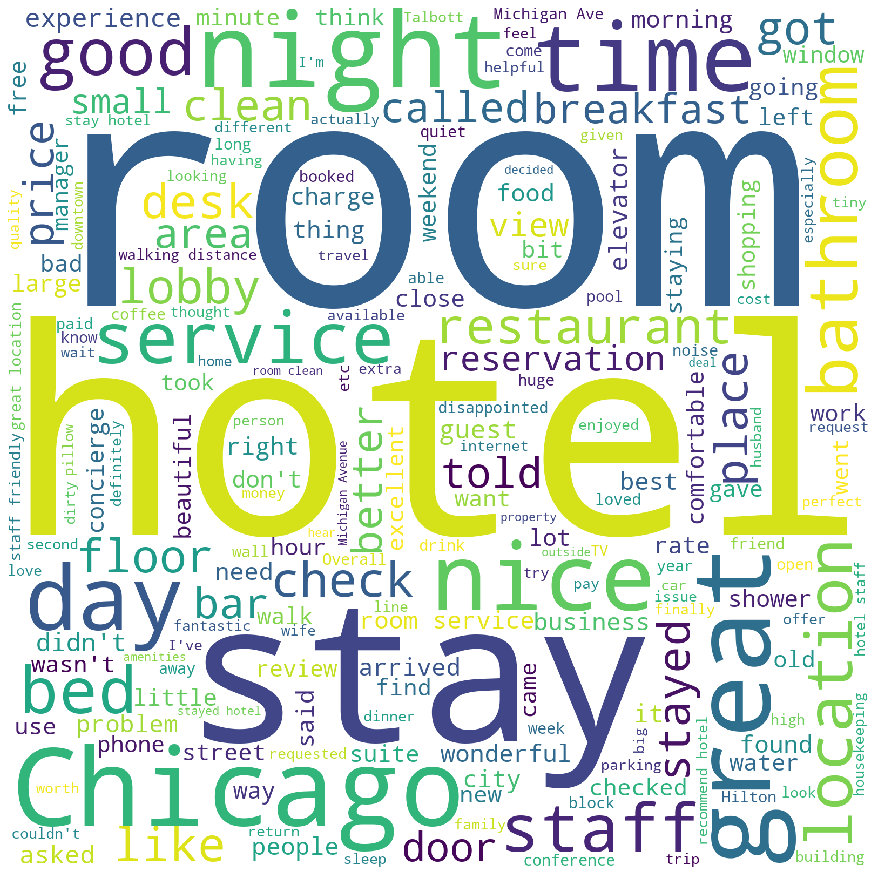

In [48]:
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',
                      stopwords= stop,
                min_font_size = 10).generate(".".join(df[df.label == 'true'].review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Most frequent words in deceptive reviews

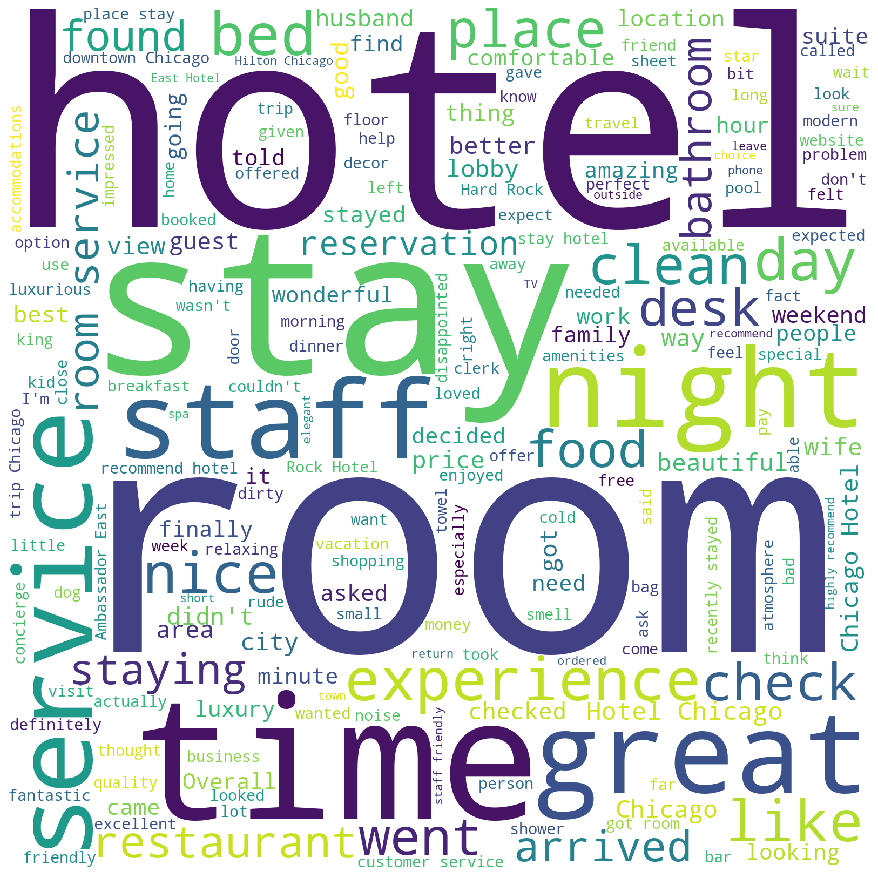

In [49]:
wordcloud = WordCloud(width = 1600, height = 1600, 
                background_color ='white',
                      stopwords= stop,
                min_font_size = 10).generate(".".join(df[df.label == 'deceptive'].review)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#Converting Text into Machine Interpretable Numbers
Storing the text in X, that is out Indepnedent Variable and Storing the labels in y that is our dependent variable.

In [0]:
X= df.review
y = df.label

Text Preprocessing

In [0]:
def preprocess(text):
    
    # Lower the Text
    text= text.lower()
    
    # Passing the text into SpaCy Document Object
    doc= nlp(text)
    
    # Extracting tokens out of SpaCy Document Object
    tokens= [str(t) for t in doc]
    
    # Removing the Punctuation
    tokens= [word.translate(str.maketrans('', '', string.punctuation)) for word in tokens]
    
    # remove words that contain numbers
    tokens = [word for word in tokens if not any(c.isdigit() for c in word)]
    
    # remove empty tokens
    tokens = [t for t in tokens if len(t) > 0]
    
    return tokens

#TFIDF Vectoriser
Using Sklearn TFIDFVectoriser
Everytime you run TFIDF vectoriser, you need to pass in a tokenizer otherwise it takes in TFIDF's default tokenizer.

You can see I passed my preprocessing function to the tokenier!! Whats happens there is when you call fit function on your trainning data, each datapoint in your review first passes to preprocess and then applies tfidf on list of words.

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer= preprocess, ngram_range=(1,2), max_features = 5000, lowercase=False)
tfid = tfidf_vectorizer.fit_transform(X)

In [53]:
dense = tfid.todense()
dense.shape

(1600, 5000)

In [0]:
x= pd.DataFrame(dense)

## Test Train split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Build the model

In [56]:
# Fitting a simple logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred= lr.predict(X_test)

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

   deceptive       0.86      0.87      0.86       193
        true       0.87      0.87      0.87       207

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [59]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.9633333333333334
Test Set Accuracy:  0.8675


In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train,y_train, cv=5)

In [61]:
scores

array([0.84583333, 0.85833333, 0.87083333, 0.8625    , 0.90416667])

There is serious overfit, this model might work well on the data it has seen but will fail on the unseen data.

Still the same problem persists we are overfitting, lets try word embeddings precisely Google's Word2Vec.

#Using Pre-Trained Word Embeddings
Google's Word2Vec
First download Pretrained Word Vectors

In [62]:
import wget
wget.download('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz')

'GoogleNews-vectors-negative300.bin.gz'

In [0]:
import gensim
google_word2vec= gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [64]:
google_word2vec['hello'].shape

(300,)

When you pass in a word in google wordevec pretrained model, it return a 300 dimensional vector. So, we are going to average out the word vectors for each row of data.

The function below takes in a sentence and averages out the word vectors for the whole sentence, so you get the 300 dimensional sentence as a result.

In [0]:
def get_mean_vector(words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in google_word2vec.vocab]
    if len(words) >= 1:
        return np.mean(google_word2vec[words], axis=0)
    else:
        return []

In [0]:
x= df.spacy.apply(lambda x: get_mean_vector([str(word) for word in x]))

In [67]:
x.shape

(1600,)

After appling mean vector, we get back 1600 dimension array, but it should be (1600, 300).

Convert this to DataFrame

In [0]:
x = pd.DataFrame(x)

In [69]:
x.head(5)

,spacy
0,"[-0.00018271421, 0.037922002, 0.015342223, 0.1..."
1,"[0.0036978093, 0.051489487, 0.029434348, 0.092..."
2,"[-0.012600954, 0.05252461, 0.032446675, 0.1181..."
3,"[0.007854728, 0.030362584, 0.029574195, 0.0996..."
4,"[-0.010252759, 0.050945256, -0.010075459, 0.11..."


In [0]:
x= x.spacy.apply(pd.Series)

In [71]:
x.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.000183,0.037922,0.015342,0.104047,-0.046769,-0.046247,0.029020,-0.094076,0.046052,0.064833,-0.048865,-0.130140,0.013673,-0.009283,-0.063016,0.039573,0.061563,0.066256,0.031479,-0.015688,0.000440,0.060388,0.029817,-0.007483,0.047305,0.021588,-0.058478,0.048857,0.022695,-0.002788,-0.019563,0.009609,-0.020094,0.028190,0.027743,-0.017771,-0.002914,-0.055579,0.029408,0.051303,0.058737,-0.048152,0.104572,0.006046,-0.004591,-0.007950,-0.022942,0.005226,0.020018,0.042502,...,-0.006136,0.041551,0.085255,0.056268,0.030619,-0.054151,0.033478,-0.000714,-0.075826,-0.072678,-0.003356,-0.021277,-0.048821,0.055706,0.048561,0.116689,0.013335,-0.032265,-0.064335,0.012049,0.049092,0.083727,0.087637,0.063285,0.073625,-0.074924,-0.031436,-0.118409,-0.049796,-0.046024,0.029008,0.002361,0.012585,0.076163,0.016291,0.028575,-0.085842,-0.049507,0.001552,0.041545,-0.065204,0.031006,-0.081857,0.042054,-0.029907,-0.004651,0.011417,-0.017715,0.029383,-0.034704
1,0.003698,0.051489,0.029434,0.092062,-0.036939,-0.037023,0.019309,-0.084944,0.062932,0.057624,-0.046732,-0.143690,-0.000685,-0.021227,-0.036342,0.036617,0.048343,0.075637,0.024006,-0.029812,-0.020600,0.037961,0.020094,-0.001926,0.042900,-0.000785,-0.074840,0.083335,0.033298,-0.030777,0.003448,0.003044,-0.040527,0.012799,0.028574,-0.011147,-0.017745,-0.022361,0.037561,0.043735,0.044850,-0.041490,0.097862,0.002151,0.008477,0.005699,-0.027708,-0.000065,0.019842,0.028422,...,0.004929,0.013025,0.088918,0.036487,0.038182,-0.059963,0.019275,0.011125,-0.074122,-0.050428,0.010093,-0.024648,-0.029947,0.053628,0.067930,0.143013,0.015060,-0.052726,-0.020679,0.017624,0.042294,0.074287,0.078675,0.053609,0.079889,-0.061700,-0.042758,-0.114607,-0.058062,-0.035044,0.049437,0.011458,-0.001110,0.043537,0.020993,0.017325,-0.090634,-0.048113,-0.010402,0.035181,-0.092064,0.041859,-0.097012,0.063265,-0.018205,-0.005541,-0.013368,-0.059534,0.051599,-0.035872
2,-0.012601,0.052525,0.032447,0.118122,-0.013177,-0.040030,0.019492,-0.086219,0.048910,0.074068,-0.041850,-0.131887,0.009637,0.000926,-0.036686,0.017049,0.037301,0.080945,0.006843,0.007285,-0.036906,0.059315,0.002881,0.010656,0.018363,0.021124,-0.093104,0.065538,0.004701,-0.028047,-0.013998,-0.004647,-0.026978,0.051852,0.021218,-0.024207,-0.019802,-0.019281,0.041769,0.059395,0.025111,-0.062422,0.100769,0.021446,0.010868,-0.031741,0.000175,-0.017238,0.002738,0.045901,...,0.038727,0.062767,0.072086,0.052788,0.030645,-0.086309,0.023878,-0.003588,-0.050509,-0.048755,0.011845,-0.016930,-0.011010,0.066875,0.051733,0.132800,-0.034980,-0.026099,-0.023403,0.008820,0.021615,0.065632,0.068706,0.032414,0.114586,-0.070900,-0.035208,-0.105227,-0.044133,-0.058968,0.053729,-0.006850,-0.006158,0.050582,0.021507,0.038929,-0.103765,0.002499,-0.045889,0.031951,-0.065395,0.035080,-0.089641,0.058177,0.002229,-0.021830,-0.026316,-0.056717,0.050726,-0.038622
3,0.007855,0.030363,0.029574,0.099682,-0.035434,-0.013955,0.020071,-0.077411,0.067980,0.065440,-0.043726,-0.141387,-0.019387,-0.009442,-0.045854,0.018927,0.062628,0.104329,0.021853,-0.009854,-0.038500,0.037343,0.034899,0.007953,0.020904,-0.006027,-0.099421,0.039693,0.009589,-0.025818,0.019870,-0.021389,-0.050599,0.036765,0.037684,-0.003073,-0.013338,-0.004679,-0.002666,0.021247,0.060032,-0.042688,0.093542,-0.002262,0.014884,-0.016727,-0.000427,0.004202,-0.014362,0.009692,...,0.006831,0.056568,0.056151,0.050221,0.066226,-0.055900,0.022479,0.025887,-0.067469,-0.045228,0.027319,-0.039029,-0.020193,0.073025,0.051621,0.116360,-0.001971,-0.012083,-0.033036,-0.020230,0.037835,0.053839,0.081866,0.033313,0.063479,-0.066332,-0.043488,-0.111974,-0.052739,-0.036905,0.025680,0.008342,0.015961,0.085978,0.0355

#Test Train split

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Build the model

In [73]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred= lr.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.7941666666666667
Test Set Accuracy:  0.77


In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

   deceptive       0.75      0.77      0.76       188
        true       0.79      0.77      0.78       212

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



We have found our best vectorisation technique.

We are going to go ahead with this word2vec pretrined Model and try to fit some other complex models model.

# Building Classification Models

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)
X_train.shape, X_test.shape

((1440, 300), (160, 300))

In [78]:
y_train.shape, y_test.shape

((1440,), (160,))

# Naive Bayesian classifier

In [79]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred= NB.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.7875
Test Set Accuracy:  0.7875


# K-Nearest Neighbour

In [82]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# XG Boost Classifer

In [83]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1, verbosity=1)

In [84]:
y_pred= xgb.predict(X_test)
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

Training Set Accuracy:  0.7875
Test Set Accuracy:  0.83125


We got a very good accuracy with XGBoost Classifier, Lets try and tunning the hyper parameters of XGboost.

#Tuning XGBoost Classifier

In [0]:
from sklearn.model_selection import GridSearchCV
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
grid_search_tune = GridSearchCV(xgb, params, cv=5, n_jobs= -1)
grid_search_tune.fit(X_train, y_train)

In [0]:
print("Best parameters set:")
print(grid_search_tune.best_estimator_)

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)
xgb.fit(X_train, y_train)

In [0]:
y_pred= xgb.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
print("Training Set Accuracy: ", accuracy_score(y_train, lr.predict(X_train)))
print("Test Set Accuracy: ", accuracy_score(y_test, y_pred))

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (7,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g', xticklabels=['Deceptive', 'True'], yticklabels=['Deceptive', 'True'])
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
plt.title("CONFUSION MATRIX", fontsize= 18)
plt.show();

In [0]:
class deceptive:
    def __init__(self, text):
        self.test= nlp(text)
        
    def get_mean_vector(self, words):
        # remove out-of-vocabulary words
        words = [word for word in words if word in google_word2vec.vocab]
        if len(words) >= 1:
            return np.mean(google_word2vec[words], axis=0)
        else:
            return []
        
    def predict(self):
        self.test= [str(t) for t in self.test]
        self.vectors= self.get_mean_vector(self.test)
        return xgb.predict(pd.DataFrame([self.vectors]))[0]

In [0]:
X[0]

In [0]:
deceptive(X[0]).predict()